# load and clean data

In [1]:
## DATA PREPROCESSING with larger and more specific stop_list
# Importing modules
import pandas as pd
import numpy as np
import os
import re
import nltk
from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

stop_list = nltk.corpus.stopwords.words('english')
# The following list is to further remove some frequent words 
# stop_list += ['would', 'said', 'say', 'year', 'day', 'also', 'first', 'last', 'one', 'two', 'told',
#               'three', 'since', 'nft', 'metaverse','fashion','amp', 
#               'project','nfts', 'eyesoffashion', "im", "u", "even", "shes", "id", "thing", "still", "one","things",
#                "going","ive","got","get","around","else", "back","go","always"]
stop_list += ["thank","do","doing","does","good", "thankyou", "thanks", "get","gets","getting","cool","check","follow",
             "drop","drops","dropping","comment", "also", "great", "go","going","goes", "let", "really",
              "much","well","use",
             'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# from nltk.stem.porter import *
# stemmer = PorterStemmer()

def clean_post(reddit):
    if type(reddit) == float:
        return ""
    
    temp = reddit.lower()
#     temp = re.sub("'", "", temp) # to avoid removing contractions in english
#     temp = re.sub("@[A-Za-z0-9_]+","", temp)
#     temp = re.sub("#[A-Za-z0-9_]+","", temp)
#     temp = re.sub(r'http\S+', '', temp)
#     temp = re.sub('[()!?]', ' ', temp)
#     temp = re.sub('\[.*?\]',' ', temp)
#     temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_list]
    #temp = [stemmer.stem(w) for w in temp]
    temp = " ".join(word for word in temp)
    return temp

In [2]:
reddit_rows_csv = pd.read_csv('merged_clean.csv', lineterminator='\n')
reddit_rows_csv

,subreddit,id,submission,p or c,Processed\r
0,CardanoNFTs,mnko80,mnko80,post,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment,im one co founders nft craze also working nft ...
2,CardanoNFTs,hb9geeo,mnko80,comment,needs tokhun io list\r
3,CardanoNFTs,gy8awd2,mnko80,comment,hey im founder also working expanding platform...
4,CardanoNFTs,gw0807w,mnko80,comment,check running mostly single mint nfts\r
...,...,...,...,...,...
87470,SolanaNFTs,t3d3ej,t3d3ej,post,free cool cats solana nft everyone worth 30 00...
87471,SolanaNFTs,hyrjnqm,t3d3ej,comment,additional details guarantee win make sure fol...
87472,SolanaNFTs,se2vdl,se2vdl,post,claim free nifty records nft joining discord\r
87473,SolanaNFTs,r8n97m,r8n97m,post,3 free nft giveaway upvote drop address\r


In [3]:
reddit_rows_csv = pd.read_csv('merged_clean.csv', lineterminator='\n')
reddit_text_list = reddit_rows_csv["Processed\r"].tolist()
reddit_results_df = pd.DataFrame()

for x in range(len(reddit_text_list)):
#     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
    dict = {'Processed': clean_post(reddit_text_list[x])}
    reddit_results_df = reddit_results_df.append(dict, ignore_index = True)
# reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
results = reddit_results_df[reddit_results_df.Processed != '']
# print('done')

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

reddit_results_df

KeyboardInterrupt: 

In [ ]:
pd.set_option("display.max_rows", None)
reddit_results_df["Processed"].value_counts()

In [ ]:
results = pd.concat([reddit_rows_csv[["subreddit","id","submission","p or c\r"]],reddit_results_df],axis=1)
#merged4.to_csv("merged_cropped_processed_topicmodelling.csv",index= False)
results

In [ ]:
# results_to_lemm = results["Processed"].tolist()
# results_to_lemm

In [ ]:
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out

In [ ]:
# reddit_results_lemmed = pd.DataFrame()

# for x in range(len(results_to_lemm)):
# #     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
#     dict = {'Lemmed': lemmatization(results_to_lemm[x],allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])}
#     reddit_results_lemmed = reddit_results_lemmed.append(dict, ignore_index = True)
# # reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
# reddit_results_lemmed

In [4]:
#results.to_csv("merged_clean_tm.csv",index= False)


In [5]:
results = pd.read_csv('merged_clean_tm.csv', lineterminator='\n')

In [6]:
r_list = results.values.tolist()
for i in r_list:
    i[3]=i[3].rstrip("\r")
    i[4]=i[4].rstrip("\r")
results = pd.DataFrame(r_list, columns = ['subreddit', 'id', 'submission', 'p or c', 'Processed'])
results

,subreddit,id,submission,p or c,Processed
0,CardanoNFTs,mnko80,mnko80,post,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment,im one co founders nft craze working nft marke...
2,CardanoNFTs,hb9geeo,mnko80,comment,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment,hey im founder working expanding platform full...
4,CardanoNFTs,gw0807w,mnko80,comment,running mostly single mint nfts
...,...,...,...,...,...
87470,SolanaNFTs,t3d3ej,t3d3ej,post,free cats solana nft everyone worth 30 000 upv...
87471,SolanaNFTs,hyrjnqm,t3d3ej,comment,additional details guarantee win make sure ste...
87472,SolanaNFTs,se2vdl,se2vdl,post,claim free nifty records nft joining discord
87473,SolanaNFTs,r8n97m,r8n97m,post,3 free nft giveaway upvote address


In [3]:
results_p = pd.read_csv('merged_clean_p.csv', lineterminator='\n')
r_list = results_p.values.tolist()
for i in r_list:
    i[4]=i[4].rstrip("\r")
    i[5]=i[5].rstrip("\r")
results_p = pd.DataFrame(r_list, columns = ['subreddit', 'id', 'submission', 'p or c', 'Processed',"author"])
results_p


,subreddit,id,submission,p or c,Processed,author
0,CardanoNFTs,mnko80,mnko80,post,cardano nft marketplace projects updated 2 9 2...,TYLRwithspaces
1,CardanoNFTs,gtyvi7w,mnko80,comment,im one co founders nft craze also working nft ...,Optimal-Role7498
2,CardanoNFTs,hb9geeo,mnko80,comment,needs tokhun io list,diarpiiiii
3,CardanoNFTs,gy8awd2,mnko80,comment,hey im founder also working expanding platform...,Padierfind
4,CardanoNFTs,gw0807w,mnko80,comment,check running mostly single mint nfts,Cryptogonewild420
...,...,...,...,...,...,...
59103,NFT,hneiioa,r9ty6n,comment,looks promising project trusted team think gon...,InfiniteHovercraft83
59104,NFT,hnee8ug,r9ty6n,comment,hu,TipAggravating5819
59105,NFT,hnf1u6i,r9ty6n,comment,congrats launch,idmontie
59106,NFT,hnf1ujz,r9ty6n,comment,cool project,evaporate99


In [4]:
reddit_text_list = results_p["Processed"].tolist()
reddit_results_df = pd.DataFrame()

for x in range(len(reddit_text_list)):
#     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
    dict = {'Processed': clean_post(reddit_text_list[x])}
    reddit_results_df = reddit_results_df.append(dict, ignore_index = True)
# reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
results = reddit_results_df[reddit_results_df.Processed != '']
# print('done')

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

reddit_results_df

,Processed
0,cardano nft marketplace projects updated 2 9 2...
1,im one co founders nft craze working nft marke...
2,needs tokhun io list
3,hey im founder working expanding platform full...
4,running mostly single mint nfts
...,...
59103,looks promising project trusted team think gon...
59104,hu
59105,congrats launch
59106,project


In [6]:
results = pd.concat([results_p[["subreddit","id","submission","p or c", "author"]],reddit_results_df],axis=1)
#merged4.to_csv("merged_cropped_processed_topicmodelling.csv",index= False)
results

,subreddit,id,submission,p or c,author,Processed
0,CardanoNFTs,mnko80,mnko80,post,TYLRwithspaces,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment,Optimal-Role7498,im one co founders nft craze working nft marke...
2,CardanoNFTs,hb9geeo,mnko80,comment,diarpiiiii,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment,Padierfind,hey im founder working expanding platform full...
4,CardanoNFTs,gw0807w,mnko80,comment,Cryptogonewild420,running mostly single mint nfts
...,...,...,...,...,...,...
59103,NFT,hneiioa,r9ty6n,comment,InfiniteHovercraft83,looks promising project trusted team think gon...
59104,NFT,hnee8ug,r9ty6n,comment,TipAggravating5819,hu
59105,NFT,hnf1u6i,r9ty6n,comment,idmontie,congrats launch
59106,NFT,hnf1ujz,r9ty6n,comment,evaporate99,project


In [7]:
# test = results[results["id"]=="hnlql8i"]["Processed"]
# print(test[48459])

In [8]:
# test2 = results[results["Processed"]=="submission r nft join us live discussion everything nfts share buy sell nfts featured bot action performed automatically please message compose r nft questions concerns"]
# test2

In [9]:
# test3 = results[results["id"]=="gwh7xnr"]["Processed"]
# print(test3[63799])

In [10]:
from nltk import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

tokenizer = RegexpTokenizer(r'\w+')
porter_stemmer = PorterStemmer()

reddit_words = []
for reddit_text in results['Processed']:
    tokens = tokenizer.tokenize(reddit_text)
    reddit_words.append(tokens)

print(len(reddit_words))

reddit_stemmed = []
for tokenized in reddit_words:
    temp = []
    for w in tokenized:
        temp.append(porter_stemmer.stem(w))
    
    reddit_stemmed.append(temp)
    
print(len(reddit_stemmed))

59108
59108


# LDA topic modelling 2

In [11]:
# !pip3 install pyLDAvis

In [12]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import pyLDAvis.gensim_models as gensimvis

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [13]:
gensim.__version__

'4.1.2'

# Reddit Data

In [14]:
# Build the bigram and trigram models
reddit_bigram = gensim.models.Phrases(reddit_words, min_count=5, threshold=100) # higher threshold fewer phrases.
reddit_trigram = gensim.models.Phrases(reddit_bigram[reddit_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
reddit_bigram_mod = gensim.models.phrases.Phraser(reddit_bigram)
reddit_trigram_mod = gensim.models.phrases.Phraser(reddit_trigram)

# See trigram example
print(reddit_trigram_mod[reddit_bigram_mod[reddit_words[0]]])

['cardano', 'nft', 'marketplace', 'projects', 'updated', '2', '9', '2022added', 'genesis', 'house', 'nftjam', 'artano', 'curated', 'marketplace', 'community', 'curated', 'high_quality', 'nft', 'marketplace', 'cardano', 'cares', 'sustainability', 'inclusivity', 'jpg_store', 'marketplace', 'trade', 'nfts', 'instantly', 'discover', 'artwork', 'explore', 'communities', 'support', 'artists', 'cardano', 'cnft_io', 'marketplace', 'digital', 'cardano', 'nft', 'token', 'platform', 'lovada', 'marketplace', 'inclusive', 'marketplace', 'cardano', 'blockchain', 'wholly', 'benefitting', 'supporting', 'artist', 'democratizing', 'art', 'market', 'genesis', 'house', 'marketplace', 'ada', 'nft', 'marketplace', 'backs', 'creators', 'genesis', 'house', 'marketplace', 'ada', 'nft', 'marketplace', 'backs', 'creators', 'nft', 'craze', 'goal', 'enable', 'artists', 'easily', 'launch', 'entire', 'collection', 'wish', 'working', 'using', 'smart_contracts', 'implement', 'shared', 'partial', 'ownership', 'nfts', '

In [15]:
def make_bigrams(texts):
    return [reddit_bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [reddit_trigram_mod[reddit_bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_list] for doc in texts_out]    
    return texts_out

In [16]:
# Form Bigrams
reddit_bigrams = make_bigrams(reddit_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
reddit_lemmatized = lemmatization(reddit_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(reddit_lemmatized[:1])

[['project', 'update', 'adde', 'genesis', 'curate', 'marketplace', 'community', 'curate', 'high_quality', 'care', 'jpg_store', 'marketplace', 'trade', 'nft', 'instantly', 'discover', 'artwork', 'explore', 'community', 'support', 'artist', 'token', 'platform', 'marketplace', 'wholly', 'benefit', 'support', 'artist', 'democratize', 'art', 'market', 'genesis', 'marketplace', 'back', 'creator', 'genesis', 'marketplace', 'back', 'creator', 'craze', 'goal', 'enable', 'artist', 'easily', 'launch', 'entire', 'collection', 'wish', 'work', 'smart_contract', 'implement', 'share', 'partial', 'ownership', 'nft', 'decentralise', 'loan', 'nft', 'dao', 'marketplace', 'unstoppable', 'self', 'organize', 'collective', 'building', 'rapid', 'dao', 'somint', 'marketplace', 'art', 'fresh', 'approach', 'passion', 'come', 'first', 'art', 'marketplace']]


In [17]:
# Create Dictionary
reddit_id2word = corpora.Dictionary(reddit_lemmatized)

# Create Corpus
reddit_texts = reddit_lemmatized

# Term Document Frequency
reddit_corpus = [reddit_id2word.doc2bow(text) for text in reddit_texts]

# View
print(reddit_corpus[:1])

[[(0, 1), (1, 1), (2, 3), (3, 3), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 2), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 8), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)]]


In [18]:
#human readable version of corpus
[[(reddit_id2word[id], freq) for id, freq in cp] for cp in reddit_corpus[:1]]

[[('adde', 1),
  ('approach', 1),
  ('art', 3),
  ('artist', 3),
  ('artwork', 1),
  ('back', 2),
  ('benefit', 1),
  ('building', 1),
  ('care', 1),
  ('collection', 1),
  ('collective', 1),
  ('come', 1),
  ('community', 2),
  ('craze', 1),
  ('creator', 2),
  ('curate', 2),
  ('dao', 2),
  ('decentralise', 1),
  ('democratize', 1),
  ('discover', 1),
  ('easily', 1),
  ('enable', 1),
  ('entire', 1),
  ('explore', 1),
  ('first', 1),
  ('fresh', 1),
  ('genesis', 3),
  ('goal', 1),
  ('high_quality', 1),
  ('implement', 1),
  ('instantly', 1),
  ('jpg_store', 1),
  ('launch', 1),
  ('loan', 1),
  ('market', 1),
  ('marketplace', 8),
  ('nft', 3),
  ('organize', 1),
  ('ownership', 1),
  ('partial', 1),
  ('passion', 1),
  ('platform', 1),
  ('project', 1),
  ('rapid', 1),
  ('self', 1),
  ('share', 1),
  ('smart_contract', 1),
  ('somint', 1),
  ('support', 2),
  ('token', 1),
  ('trade', 1),
  ('unstoppable', 1),
  ('update', 1),
  ('wholly', 1),
  ('wish', 1),
  ('work', 1)]]

# reddit LDA topics

In [19]:
from imp import reload

In [20]:
reddit_topics = []
reddit_perplexity_score = []
reddit_coherence_score = []
reddit_vis = []
reddit_lda_model_list = []

for i in range(3,6):
    reddit_lda_model = gensim.models.ldamodel.LdaModel(corpus=reddit_corpus,
                                           id2word=reddit_id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    print(type(reddit_lda_model))
    reddit_topics.append(reddit_lda_model.show_topics(num_topics=i,num_words=30))
    
    reddit_perplexity_score.append(reddit_lda_model.log_perplexity(reddit_corpus))
    print('\nPerplexity: ', reddit_perplexity_score[i-3])  # a measure of how good the model is. lower the better.
    
    coherence_model_lda = CoherenceModel(model=reddit_lda_model, texts=reddit_lemmatized, dictionary=reddit_id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    reddit_coherence_score.append(coherence_lda)
    print('\nCoherence Score: ', coherence_lda)
    
    pyLDAvis.enable_notebook()
    vis_i = pyLDAvis.gensim_models.prepare(reddit_lda_model, reddit_corpus, reddit_id2word)
    reddit_vis.append(vis_i)
    reddit_lda_model_list.append(reddit_lda_model)
    
print(type(reddit_lda_model_list[0]))

<class 'gensim.models.ldamodel.LdaModel'>

Perplexity:  -8.08807630190804

Coherence Score:  0.48067422637868157
<class 'gensim.models.ldamodel.LdaModel'>

Perplexity:  -8.200242865441382

Coherence Score:  0.4261004763933209
<class 'gensim.models.ldamodel.LdaModel'>

Perplexity:  -8.282667655016267

Coherence Score:  0.4505568015568839
<class 'gensim.models.ldamodel.LdaModel'>


In [21]:
reddit_topics

[[(0,
   '0.113*"nft" + 0.048*"buy" + 0.047*"love" + 0.044*"sell" + 0.034*"join" + 0.032*"share" + 0.027*"mint" + 0.027*"submission" + 0.027*"live_discussion" + 0.026*"project" + 0.017*"amazing" + 0.015*"compose" + 0.015*"please_message" + 0.015*"bot_action" + 0.010*"eth" + 0.009*"beautiful" + 0.008*"first" + 0.008*"right" + 0.008*"give" + 0.008*"price" + 0.008*"guy" + 0.007*"twitter" + 0.007*"sick" + 0.007*"leave" + 0.007*"super" + 0.006*"congrat" + 0.006*"day" + 0.006*"send" + 0.006*"giveaway" + 0.006*"discord"'),
  (1,
   '0.021*"collection" + 0.014*"create" + 0.013*"game" + 0.013*"nft" + 0.013*"launch" + 0.012*"free" + 0.011*"address" + 0.011*"first" + 0.008*"world" + 0.007*"blockchain" + 0.007*"token" + 0.007*"available" + 0.007*"unique" + 0.006*"value" + 0.006*"team" + 0.006*"platform" + 0.006*"owner" + 0.006*"floor" + 0.006*"wallet" + 0.005*"part" + 0.005*"future" + 0.005*"place" + 0.005*"market" + 0.005*"metaverse" + 0.005*"card" + 0.005*"public" + 0.004*"different" + 0.004*"we

ValueError: x and y must have same first dimension, but have shapes (2,) and (3,)

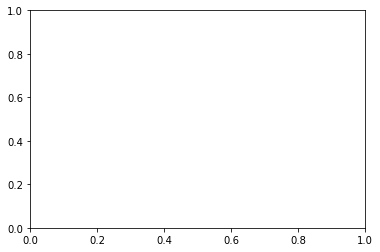

In [22]:
import matplotlib.pyplot as plt

limit=2+len(reddit_perplexity_score); start=3; step=1;
x = range(start, limit, step)
plt.plot(x, reddit_perplexity_score,label='perplexity')
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [ ]:
# MEDIA COHERENCE SCORE 
limit=2+len(reddit_coherence_score); start=3; step=1;
x = range(start, limit, step)
plt.plot(x, reddit_coherence_score,label='coherence')
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence"), loc='best')
plt.show()

What does perplexity and Coherance Score tell us?<br> 
- Perplexity: Calculate the held out log-likelihood
- Coherence: Calculate the conditional likelihood of co-occurrence
The perplexity metric is a predictive one. It assesses a topic model’s ability to predict a test set after having been trained on a training set. But does not tell us if its coherant. As the perplexity score improves (ie. the held out log-likelihood is higher), the human interpretability of topics get worse (rather than better).<br>



In [37]:
reddit_vis[0]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.304544  0.112842       1        1  46.518084
1     -0.044175 -0.294857       2        1  29.277691
0     -0.260369  0.182015       3        1  24.204225, topic_info=        Term          Freq         Total Category  logprob  loglift
36       nft  12082.000000  12082.000000  Default  30.0000  30.0000
137      buy   4484.000000   4484.000000  Default  29.0000  29.0000
126     love   4452.000000   4452.000000  Default  28.0000  28.0000
154     sell   4180.000000   4180.000000  Default  27.0000  27.0000
145     join   3209.000000   3209.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
332      big    405.384389    407.404326   Topic3  -5.4462   1.4137
255    right    794.535826    811.389557   Topic3  -4.7732   1.3977
36       nft  10618.538204  12082.464023   Topic3  -2.1806   1.2895
42   project   2433.240116   2873.513756   Topic3  -3.6540   1.2523
24     first    795.869313   2009.457551   Topic3  -4.7716   0.4925

[134 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
103       1  0.002140      add
103       2  0.997462      add
750       1  0.000785  address
750       2  0.999238  address
750       3  0.000785  address
...     ...       ...      ...
555       2  0.997532      win
55        1  0.999721     work
55        2  0.000259     work
291       1  0.001116    world
291       2  0.999065    world

[207 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [24]:
for i in range(len(reddit_vis)):
    name = "reddit_lda_p"+str(i)+".html"
    pyLDAvis.save_html(reddit_vis[i],name)

In [25]:
topic_1 = []
topic_1_string = ''

topic_2 = []
topic_2_string = ''

topic_3 = []
topic_3_string = ''

check1 = reddit_topics[0][0][1].split("\"")
check1 = [s.rstrip("*").lstrip(" + ") for s in check1]

check2 = reddit_topics[0][1][1].split("\"")
check2 = [s.rstrip("*").lstrip(" + ") for s in check2]

check3 = reddit_topics[0][2][1].split("\"")
check3 = [s.rstrip("*").lstrip(" + ") for s in check3]

In [26]:
check2

['0.021',
 'collection',
 '0.014',
 'create',
 '0.013',
 'game',
 '0.013',
 'nft',
 '0.013',
 'launch',
 '0.012',
 'free',
 '0.011',
 'address',
 '0.011',
 'first',
 '0.008',
 'world',
 '0.007',
 'blockchain',
 '0.007',
 'token',
 '0.007',
 'available',
 '0.007',
 'unique',
 '0.006',
 'value',
 '0.006',
 'team',
 '0.006',
 'platform',
 '0.006',
 'owner',
 '0.006',
 'floor',
 '0.006',
 'wallet',
 '0.005',
 'part',
 '0.005',
 'future',
 '0.005',
 'place',
 '0.005',
 'market',
 '0.005',
 'metaverse',
 '0.005',
 'card',
 '0.005',
 'public',
 '0.004',
 'different',
 '0.004',
 'website',
 '0.004',
 'stake',
 '0.004',
 'add',
 '']

In [27]:
for i in range(30):
    topic_1.append((check1[(i*2)+1],check1[i*2]))
    topic_1_string += check1[(i*2)+1]
    topic_1_string += " "
    
    topic_2.append((check2[(i*2)+1],check2[i*2]))
    topic_2_string += check2[(i*2)+1]
    topic_2_string += " "
    
    topic_3.append((check3[(i*2)+1],check3[i*2]))
    topic_3_string += check3[(i*2)+1]
    topic_3_string += " "

In [28]:
print("Topic 1: ",topic_1_string)
print(" ")
print("Topic 2: ",topic_2_string)
print(" ")
print("Topic 3: ",topic_3_string)
print(" ")

Topic 1:  nft buy love sell join share mint submission live_discussion project amazing compose please_message bot_action eth beautiful first right give price guy twitter sick leave super congrat day send giveaway discord 
 
Topic 2:  collection create game nft launch free address first world blockchain token available unique value team platform owner floor wallet part future place market metaverse card public different website stake add 
 
Topic 3:  look work art make nice awesome see think new people know want time link lol opensea take artist piece need say way hope dope find try idea post lot thing 
 


In [29]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(reddit_lda_model_list[0], reddit_corpus, reddit_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5639,"collection, create, game, nft, launch, free, a...","[project, update, adde, genesis, curate, marke..."
1,1,1.0,0.6225,"collection, create, game, nft, launch, free, a...","[co, founder, craze, work, back, defi, goal, e..."
2,2,2.0,0.4691,"look, work, art, make, nice, awesome, see, thi...","[need, tokhun_io, list]"
3,3,1.0,0.5688,"collection, create, game, nft, launch, free, a...","[founder, work, expand, platform, full, blow, ..."
4,4,2.0,0.4402,"look, work, art, make, nice, awesome, see, thi...","[run, mostly, single, mint, nft]"
5,5,1.0,0.5260,"collection, create, game, nft, launch, free, a...","[gamifie, allow, human, collect, trade, audiob..."
6,6,2.0,0.5719,"look, work, art, make, nice, awesome, see, thi...","[like, mint, digital, art]"
7,7,1.0,0.5521,"collection, create, game, nft, launch, free, a...","[add, beta, artist, able, list, sale, open, pu..."
8,8,2.0,0.5665,"look, work, art, make, nice, awesome, see, thi...","[somint, twitter, link, point, reddit]"
9,9,1.0,0.4224,"collection, create, game, nft, launch, free, a...","[digital, trading_card, metaverse, asset, live..."


In [30]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5639,"collection, create, game, nft, launch, free, a...","[project, update, adde, genesis, curate, marke..."
1,1,1.0,0.6225,"collection, create, game, nft, launch, free, a...","[co, founder, craze, work, back, defi, goal, e..."
2,2,2.0,0.4691,"look, work, art, make, nice, awesome, see, thi...","[need, tokhun_io, list]"
3,3,1.0,0.5688,"collection, create, game, nft, launch, free, a...","[founder, work, expand, platform, full, blow, ..."
4,4,2.0,0.4402,"look, work, art, make, nice, awesome, see, thi...","[run, mostly, single, mint, nft]"
...,...,...,...,...,...
59103,59103,2.0,0.4945,"look, work, art, make, nice, awesome, see, thi...","[look, promise, project, trust, team, think, f..."
59104,59104,2.0,0.4700,"look, work, art, make, nice, awesome, see, thi...",[]
59105,59105,2.0,0.3653,"look, work, art, make, nice, awesome, see, thi...","[congrat, launch]"
59106,59106,2.0,0.4229,"look, work, art, make, nice, awesome, see, thi...",[project]


In [31]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 500

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(10)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.7867,"nft, buy, love, sell, join, share, mint, submission, live_discussion, project","[mint, price, nft, robots_hundred, different_part, put_together, create_million, roadmap, sell, holders_, sell, list, project, rarity_tool, sold_, donated_charity, metaverse, sold_hire, development, game, giveaway, currently_runne, react_giveaway, invite, role, discord, running_daily, giveaway, twitter, way_upto, discord, twitter, polydroid, giveaway, twitter, upvote]"
1,0.0,0.7867,"nft, buy, love, sell, join, share, mint, submission, live_discussion, project","[mint, price, nft, robots_hundred, different_part, put_together, create_million, roadmap, sell, holders_, sell, list, project, rarity_tool, sold_, donated_charity, metaverse, sold_hire, development, game, giveaway, currently_runne, react_giveaway, invite, role, discord, running_daily, giveaway, twitter, way_upto, discord, twitter, polydroid, giveaway, twitter, upvote]"
2,0.0,0.7867,"nft, buy, love, sell, join, share, mint, submission, live_discussion, project","[mint, price, nft, robots_hundred, different_part, put_together, create_million, roadmap, sell, holders_, sell, list, project, rarity_tool, sold_, donated_charity, metaverse, sold_hire, development, game, giveaway, currently_runne, react_giveaway, invite, role, discord, running_daily, giveaway, twitter, way_upto, discord, twitter, polydroid, giveaway, twitter, upvote]"
3,0.0,0.7867,"nft, buy, love, sell, join, share, mint, submission, live_discussion, project","[mint, price, nft, robots_hundred, different_part, put_together, create_million, roadmap, sell, holders_, sell, list, project, rarity_tool, sold_, donated_charity, metaverse, sold_hire, development, game, giveaway, currently_runne, react_giveaway, invite, role, discord, running_daily, giveaway, twitter, way_upto, discord, twitter, polydroid, giveaway, twitter, upvote]"
4,0.0,0.7867,"nft, buy, love, sell, join, share, mint, submission, live_discussion, project","[mint, price, nft, robots_hundred, different_part, put_together, create_million, roadmap, sell, holders_, sell, list, project, rarity_tool, sold_, donated_charity, metaverse, sold_hire, development, game, giveaway, currently_runne, react_giveaway, invite, role, discord, running_daily, giveaway, twitter, way_upto, discord, twitter, polydroid, giveaway, twitter, upvote]"
5,0.0,0.7867,"nft, buy, love, sell, join, share, mint, submission, live_discussion, project","[mint, price, nft, robots_hundred, different_part, put_together, create_million, roadmap, sell, holders_, sell, list, project, rarity_tool, sold_, donated_charity, metaverse, sold_hire, development, game, giveaway, currently_runne, react_giveaway, invite, role, discord, running_daily, giveaway, twitter, way_upto, discord, twitter, polydroid, giveaway, twitter, upvote]"
6,0.0,0.7867,"nft, buy, love, sell, join, share, mint, submission, live_discussion, project","[mint, price, nft, robots_hundred, different_part, put_together, create_million, roadmap, sell, holders_, sell, list, project, rarity_tool, sold_, donated_charity, metaverse, sold_hire, development, game, giveaway, currently_runne, react_giveaway, invite, role, discord, running_daily, giveaway, twitter, way_upto, discord, twitter, polydroid, giveaway, twitter, upvote]"
7,0.0,0.7867,"nft, buy, love, sell, join, share, mint, submission, live_discussion, project","[mint, price, nft, robots_hundred, different_part, put_together, create_million, roadmap, sell, holders_, sell, list, project, rarity_tool, sold_, donated_charity, metaverse, sold_hire, development, game, giveaway, currently_runne, react_giveaway, invite, role, discord, running_daily, giveaway, twitter, way_upto, discord, twitter, polydroid, giveaway, twitter, upvote]"
8,0.0,0.7867,"nft, buy, love, sell, join, share, mint, submission, live_discussion, project","[mint, price, nft, robots_hundred, different_part, put_together, create_million, roadmap, sell, holders_, sell, list, p

In [32]:
avada_kedavra = pd.concat([results,df_dominant_topic], axis=1)
avada_kedavra

,subreddit,id,submission,p or c,author,Processed,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,CardanoNFTs,mnko80,mnko80,post,TYLRwithspaces,cardano nft marketplace projects updated 2 9 2022added genesis house nftjam artano curated marketplace community curated high quality nft marketplace cardano cares sustainability inclusivity jpg store marketplace trade nfts instantly discover artwork explore communities support artists cardano cnft io marketplace digital cardano nft token platform lovada marketplace inclusive marketplace cardano blockchain wholly benefitting supporting artist democratizing art market genesis house marketplac...,0,1.0,0.5639,"collection, create, game, nft, launch, free, address, first, world, blockchain","[project, update, adde, genesis, curate, marketplace, community, curate, high_quality, care, jpg_store, marketplace, trade, nft, instantly, discover, artwork, explore, community, support, artist, token, platform, marketplace, wholly, benefit, support, artist, democratize, art, market, genesis, marketplace, back, creator, genesis, marketplace, back, creator, craze, goal, enable, artist, easily, launch, entire, collection, wish, work, smart_contract, implement, share, partial, ownership, nft, ..."
1,CardanoNFTs,gtyvi7w,mnko80,comment,Optimal-Role7498,im one co founders nft craze working nft marketplace nft backed defi goal enable artists easily launch entire collection wish working using smart contracts implement shared partial ownership nfts decentralised p2p loans using nfts collateral would allow users earn higher apy lending loan interest paid deadline ownership full partial nft transferred lender youd like see find us soon launch presale first collection acting funding round build described youd like see happen please help us spread...,1,1.0,0.6225,"collection, create, game, nft, launch, free, address, first, world, blockchain","[co, founder, craze, work, back, defi, goal, enable, artist, easily, launch, entire, collection, wish, work, smart_contract, implement, share, partial, ownership, nft, decentralise, loan, nft, collateral, allow, user, earn, high, lending, loan, interest, pay, deadline, ownership, full, partial, transfer, lender, see, find, soon, launch, presale, first, act, funding, round, build, describe, see, happen, help, participate, collection, launch, week]"
2,CardanoNFTs,hb9geeo,mnko80,comment,diarpiiiii,needs tokhun io list,2,2.0,0.4691,"look, work, art, make, nice, awesome, see, think, new, people","[need, tokhun_io, list]"
3,CardanoNFTs,gy8awd2,mnko80,comment,Padierfind,hey im founder working expanding platform full blown decentralized marketplace,3,1.0,0.5688,"collection, create, game, nft, launch, free, address, first, world, blockchain","[founder, work, expand, platform, full, blow, decentralized, marketplace]"
4,CardanoNFTs,gw0807w,mnko80,comment,Cryptogonewild420,running mostly single mint nfts,4,2.0,0.4402,"look, work, art, make, nice, awesome, see, think, new, people","[run, mostly, single, mint, nft]"
...,...,...,...,...,...,...,...,...,...,...,...
59103,NFT,hneiioa,r9ty6n,comment,InfiniteHovercraft83,looks promising project trusted team think gonna fly moon,59103,2.0,0.4945,"look, work, art, make, nice, awesome, see, think, new, people","[look, promise, project, trust, team, think, fly, moon]"
59104,NFT,hnee8ug,r9ty6n,comment,TipAggravating5819,hu,59104,2.0,0.4700,"look, work, art, make, nice, awesome, see, think, new, people",[]
59105,NFT,hnf1u6i,r9ty6n,comment,idmontie,congrats launch,59105,2.0,0.3653,"look, work, art, make, nice, awesome, see, think, new, people","[congrat, launch]"
59106,NFT,hnf1ujz,r9ty6n,comment,evaporate99,project,59106,2.0,0.4229,"look, work, art, make, nice, awesome, see, think, new, people",[project]


In [33]:
avada_kedavra["Dominant_Topic"].value_counts()

2.0    50133
0.0     5414
1.0     3561
Name: Dominant_Topic, dtype: int64

In [34]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 500

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = avada_kedavra.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=False).head(10)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet[["id","Dominant_Topic","Topic_Perc_Contrib","Processed","subreddit","p or c"]]

,id,Dominant_Topic,Topic_Perc_Contrib,Processed,subreddit,p or c
0,hgu9lnt,0.0,0.7867,polydroids public sale starts 01 11 21 supply 10k mint price 40 matic description poly droids generated nft robots hundreds different parts put together create millions potential combinations roadmap 5 sold 25 polydroids distributed randomly holders 15 sold list project rarity tools 50 sold 10000 donated charity communitys choice 75 sold expand polydroid metaverse 100 sold hire development team aid game development integration polydroid metaverse giveaways currently running react giveaways i...,NFTExchange,comment
1,hgu9goz,0.0,0.7867,polydroids public sale starts 01 11 21 supply 10k mint price 40 matic description poly droids generated nft robots hundreds different parts put together create millions potential combinations roadmap 5 sold 25 polydroids distributed randomly holders 15 sold list project rarity tools 50 sold 10000 donated charity communitys choice 75 sold expand polydroid metaverse 100 sold hire development team aid game development integration polydroid metaverse giveaways currently running react giveaways i...,NFTExchange,comment
2,hgu9hn5,0.0,0.7867,polydroids public sale starts 01 11 21 supply 10k mint price 40 matic description poly droids generated nft robots hundreds different parts put together create millions potential combinations roadmap 5 sold 25 polydroids distributed randomly holders 15 sold list project rarity tools 50 sold 10000 donated charity communitys choice 75 sold expand polydroid metaverse 100 sold hire development team aid game development integration polydroid metaverse giveaways currently running react giveaways i...,NFTExchange,comment
3,hgu9hid,0.0,0.7867,polydroids public sale starts 01 11 21 supply 10k mint price 40 matic description poly droids generated nft robots hundreds different parts put together create millions potential combinations roadmap 5 sold 25 polydroids distributed randomly holders 15 sold list project rarity tools 50 sold 10000 donated charity communitys choice 75 sold expand polydroid metaverse 100 sold hire development team aid game development integration polydroid metaverse giveaways currently running react giveaways i...,NFTExchange,comment
4,hgjbu66,0.0,0.7867,polydroids public sale starts 01 11 21 supply 10k mint price 40 matic description poly droids generated nft robots hundreds different parts put together create millions potential combinations roadmap 5 sold 25 polydroids distributed randomly holders 15 sold list project rarity tools 50 sold 10000 donated charity communitys choice 75 sold expand polydroid metaverse 100 sold hire development team aid game development integration polydroid metaverse giveaways currently running react giveaways i...,NFTExchange,comment
5,hgu9hd6,0.0,0.7867,polydroids public sale starts 01 11 21 supply 10k mint price 40 matic description poly droids generated nft robots hundreds different parts put together create millions potential combinations roadmap 5 sold 25 polydroids distributed randomly holders 15 sold list project rarity tools 50 sold 10000 donated charity communitys choice 75 sold expand polydroid metaverse 100 sold hire development team aid game development integration polydroid metaverse giveaways currently running react giveaways i...,NFTExchange,comment
6,hgu9gvc,0.0,0.7867,polydroids public sale starts 01 11 21 supply 10k mint price 40 matic description poly droids generated nft robots hundreds different parts put together create millions potential combinations roadmap 5 sold 25 polydroids distributed randomly holders 15 sold list project rarity tools 50 sold 10000 donated charity communitys choice 75 sold expand polydroid metaverse 100 sold hire development team aid game development integration polydroid metaverse giveaways currently running react giveaways i...,NFTExchange,comment
7,hgea621,0.0,0.7867,polydroids public sale starts 01 11 21 supply 10k mint price 40 matic description poly droids generated nft robots hundreds dif